#ID3

In [20]:
import pandas as pd 
import json
import os
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [21]:
#Read data
RESULTS_FILE = "summary1.json"

with open(RESULTS_FILE, "r") as file:
    data = json.load(file)

metrics_per_fold = pd.DataFrame([
    {
        "fold": fold_data["fold"],
        "accuracy": fold_data["classification_report"]["accuracy"],
        "precision": np.mean([
            fold_data["classification_report"][cls]["precision"]
            for cls in ["1", "2", "3", "4"]
        ])
    }
    for fold_data in data["metrics_per_fold"]
    if "classification_report" in fold_data
])

display(metrics_per_fold)

,fold,accuracy,precision
0,0,0.880000,0.805055
1,1,0.813333,0.691370
2,2,0.820000,0.722928
3,3,0.803333,0.809536
4,4,0.810000,0.810486


## Parâmetros utilizados

In [22]:

parameters = data["metrics_per_fold"][0]  # Primeiro item contém os parâmetros gerais

print("Parâmetros do Modelo:")
for key, value in parameters.items():
    print(f"{key}: {value}")

Parâmetros do Modelo:
criterion: entropy
max_depth: None
min_samples_split: 2
max_features: sqrt
max_leaf_nodes: None
splitter: best
ccp_alpha: 0.001
random_state: 42


## Gráfico de Acurácia Média
Visualização da acurácia média para cada fold.


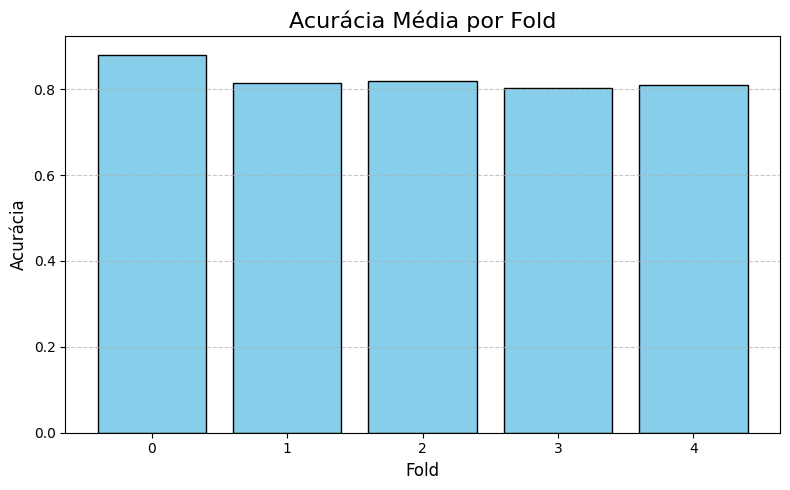

In [23]:
# Criar gráfico de acurácia média
plt.figure(figsize=(8, 5))
plt.bar(metrics_per_fold["fold"], metrics_per_fold["accuracy"], color="skyblue", edgecolor="black")
plt.title("Acurácia Média por Fold", fontsize=16)
plt.xlabel("Fold", fontsize=12)
plt.ylabel("Acurácia", fontsize=12)
plt.xticks(metrics_per_fold["fold"], fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


## Gráfico de Precisão Média
Visualização da precisão média para cada fold.


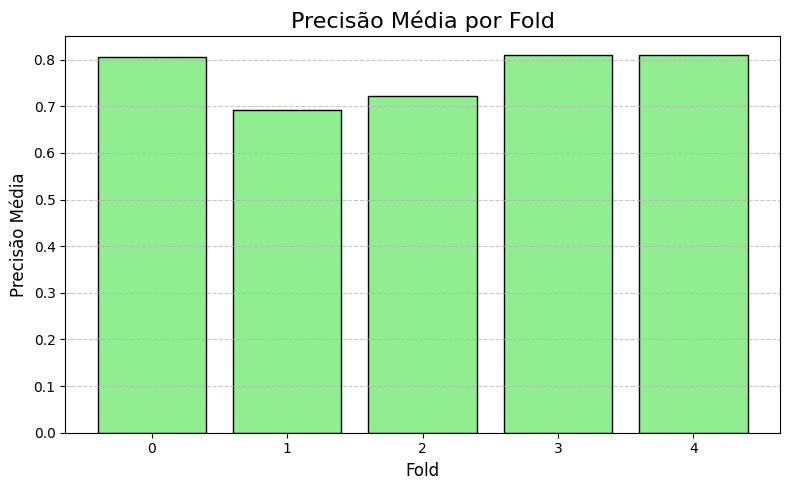

In [24]:
# Criar gráfico de precisão média
plt.figure(figsize=(8, 5))
plt.bar(metrics_per_fold["fold"], metrics_per_fold["precision"], color="lightgreen", edgecolor="black")
plt.title("Precisão Média por Fold", fontsize=16)
plt.xlabel("Fold", fontsize=12)
plt.ylabel("Precisão Média", fontsize=12)
plt.xticks(metrics_per_fold["fold"], fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


 # Acurácia Média por Fold

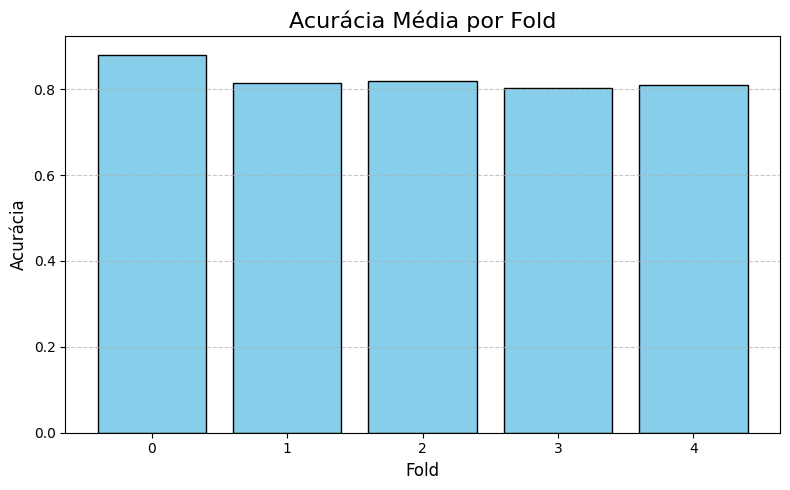

In [25]:
# Gráfico de Acurácia Média por Fold
plt.figure(figsize=(8, 5))
plt.bar(metrics_per_fold["fold"], metrics_per_fold["accuracy"], color="skyblue", edgecolor="black")
plt.title("Acurácia Média por Fold", fontsize=16)
plt.xlabel("Fold", fontsize=12)
plt.ylabel("Acurácia", fontsize=12)
plt.xticks(metrics_per_fold["fold"], fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

# Precisão Média por Fold

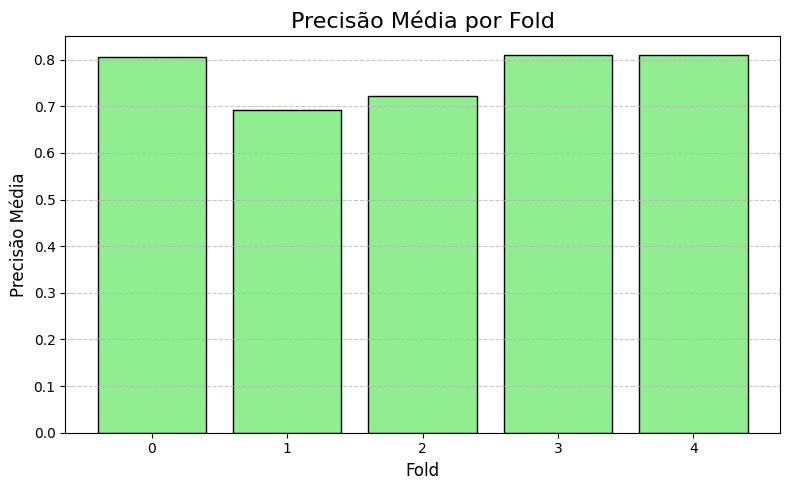

In [26]:
# Gráfico de Precisão Média por Fold
plt.figure(figsize=(8, 5))
plt.bar(metrics_per_fold["fold"], metrics_per_fold["precision"], color="lightgreen", edgecolor="black")
plt.title("Precisão Média por Fold", fontsize=16)
plt.xlabel("Fold", fontsize=12)
plt.ylabel("Precisão Média", fontsize=12)
plt.xticks(metrics_per_fold["fold"], fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


# Profundidade Média da Árvore

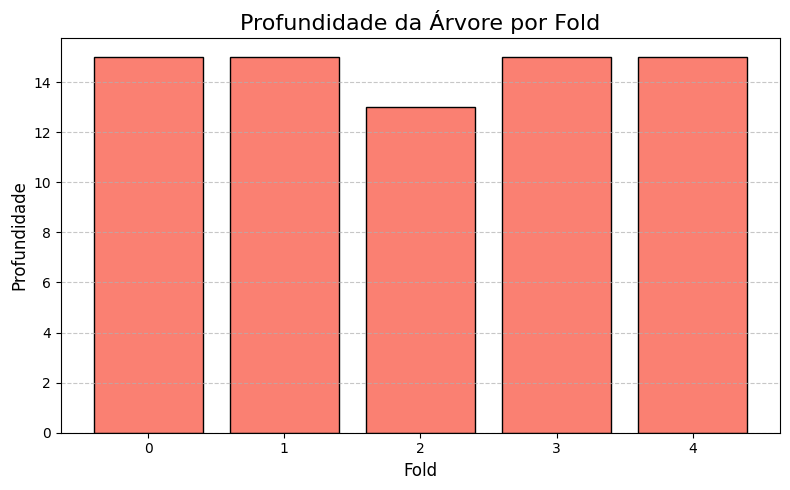

In [27]:
# Adicionar profundidade ao DataFrame
metrics_per_fold["tree_depth"] = [
    fold_data["tree_depth"]
    for fold_data in data["metrics_per_fold"]
    if "tree_depth" in fold_data
]

# Gráfico de Profundidade Média da Árvore
plt.figure(figsize=(8, 5))
plt.bar(metrics_per_fold["fold"], metrics_per_fold["tree_depth"], color="salmon", edgecolor="black")
plt.title("Profundidade da Árvore por Fold", fontsize=16)
plt.xlabel("Fold", fontsize=12)
plt.ylabel("Profundidade", fontsize=12)
plt.xticks(metrics_per_fold["fold"], fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


# F1-Score por Classe

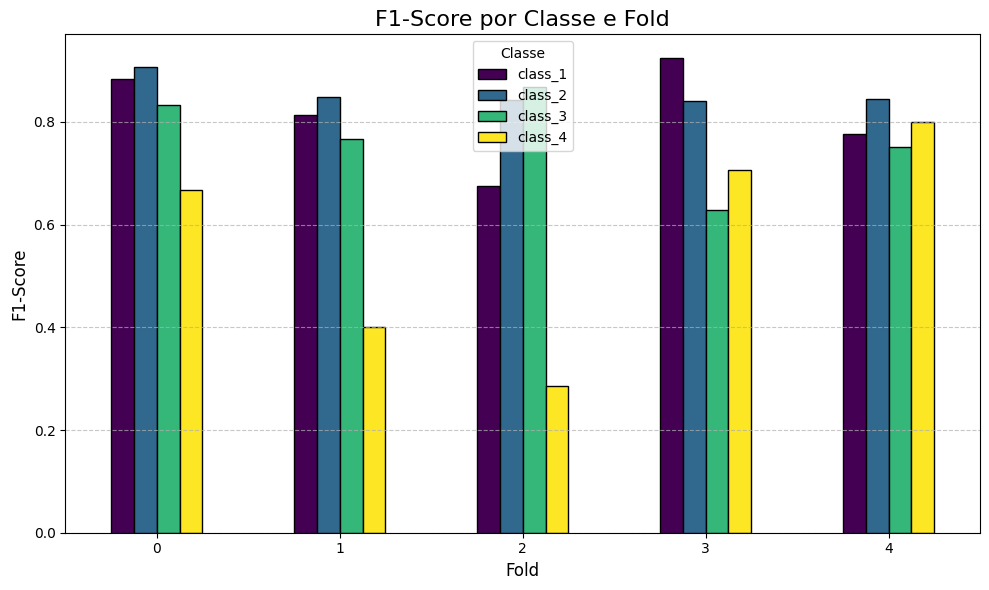

In [28]:
# Consolidar F1-scores por classe
f1_scores = pd.DataFrame([
    {
        "fold": fold_data["fold"],
        "class_1": fold_data["classification_report"]["1"]["f1-score"],
        "class_2": fold_data["classification_report"]["2"]["f1-score"],
        "class_3": fold_data["classification_report"]["3"]["f1-score"],
        "class_4": fold_data["classification_report"]["4"]["f1-score"],
    }
    for fold_data in data["metrics_per_fold"]
    if "classification_report" in fold_data
])

# Gráfico de F1-score por Classe
f1_scores.set_index("fold").plot(kind="bar", figsize=(10, 6), colormap="viridis", edgecolor="black")
plt.title("F1-Score por Classe e Fold", fontsize=16)
plt.xlabel("Fold", fontsize=12)
plt.ylabel("F1-Score", fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title="Classe", fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()
